In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [89]:

df=pd.read_csv('dataset.csv')
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,...,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,...,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [90]:
df.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [91]:
df.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [92]:
X = df.drop(columns=["label", "filename"])
y = df["label"].astype("category").cat.codes


In [93]:
features = df.drop(columns=["filename", "label"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [95]:
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,...,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,...,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [96]:
correlation_matrix = pd.DataFrame(scaled_features, columns=features.columns).corr()
correlation_matrix

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
chroma_stft,1.000000,0.499719,0.615641,0.517610,0.598028,0.554781,0.659359,-0.598575,-0.054314,0.263978,...,0.072807,0.516568,-0.081434,0.417038,-0.143370,0.332342,-0.163270,0.269794,-0.089680,0.282005
rmse,0.499719,1.000000,0.509984,0.529768,0.537718,0.332119,0.807260,-0.483765,0.139339,0.008695,...,0.117410,0.183310,0.012818,0.163065,-0.011243,0.083827,-0.029601,0.118253,0.031517,0.124827
spectral_centroid,0.615641,0.509984,1.000000,0.904438,0.979633,0.874755,0.720831,-0.940171,0.187999,-0.136839,...,0.152749,0.174946,0.051260,0.170689,0.022393,0.153678,0.027403,0.228048,0.027761,0.269598
spectral_bandwidth,0.517610,0.529768,0.904438,1.000000,0.956194,0.612325,0.648373,-0.896660,0.494052,-0.279636,...,0.289572,0.038078,0.205272,0.054740,0.127649,0.027062,0.104914,0.114624,0.098151,0.187932
rolloff,0.598028,0.537718,0.979633,0.956194,1.000000,0.779809,0.721746,-0.934305,0.295590,-0.156114,...,0.173940,0.162827,0.081738,0.158572,0.032146,0.132326,0.039624,0.205010,0.048121,0.256644
zero_crossing_rate,0.554781,0.332119,0.874755,0.612325,0.779809,1.000000,0.634139,-0.760127,-0.179883,-0.007672,...,-0.044591,0.263046,-0.142050,0.240698,-0.107069,0.249474,-0.076885,0.297152,-0.074580,0.305031
mfcc1,0.659359,0.807260,0.720831,0.648373,0.721746,0.634139,1.000000,-0.638911,-0.101078,0.108676,...,-0.027021,0.331619,-0.171697,0.252206,-0.200787,0.185659,-0.208503,0.199769,-0.121578,0.195352
mfcc2,-0.598575,-0.483765,-0.940171,-0.896660,-0.934305,-0.760127,-0.638911,1.000000,-0.268841,0.049740,...,-0.203910,-0.176990,-0.110567,-0.195790,-0.064465,-0.160305,-0.051064,-0.202594,-0.027793,-0.238651
mfcc3,-0.054314,0.139339,0.187999,0.494052,0.295590,-0.179883,-0.101078,-0.268841,1.000000,-0.409602,...,0.427344,-0.338699,0.425021,-0.262859,0.298628,-0.298056,0.250401,-0.190987,0.230076,-0.076974
mfcc4,0.263978,0.008695,-0.136839,-0.279636,-0.156114,-0.007672,0.108676,0.049740,-0.409602,1.000000,...,-0.380199,0.582581,-0.459186,0.449924,-0.441892,0.408342,-0.405826,0.151417,-0.278504,0.097734


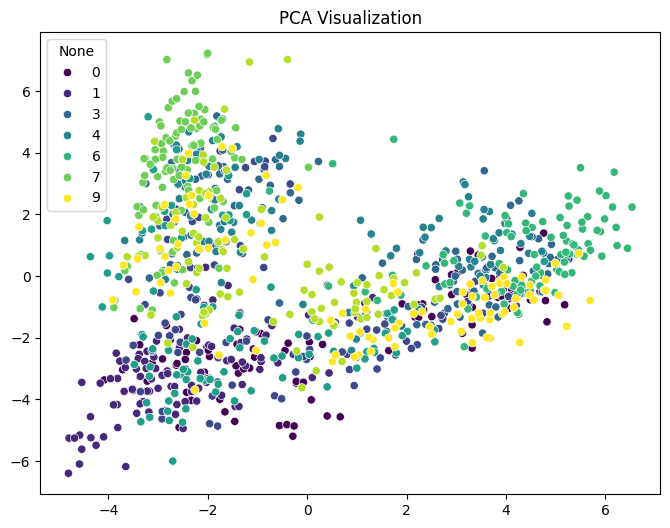

In [97]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="viridis")
plt.title("PCA Visualization")
plt.show()

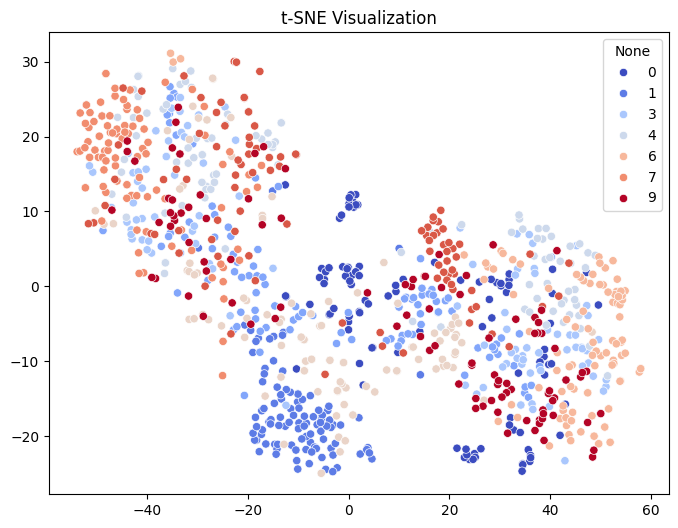

In [98]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette="coolwarm")
plt.title("t-SNE Visualization")
plt.show()


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [101]:
models = {"GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
          "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42),
          "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
          #"LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
         }


In [102]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    

GradientBoosting Accuracy: 0.6000
RandomForest Accuracy: 0.6100
XGBoost Accuracy: 0.6150


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.86      0.92      0.89        13
           2       0.68      0.56      0.61        27
           3       0.64      0.43      0.51        21
           4       0.41      0.60      0.49        15
           5       0.59      0.73      0.65        22
           6       0.76      0.88      0.81        25
           7       0.67      0.77      0.71        13
           8       0.61      0.48      0.54        23
           9       0.43      0.43      0.43        21

    accuracy                           0.61       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.62      0.61      0.61       200



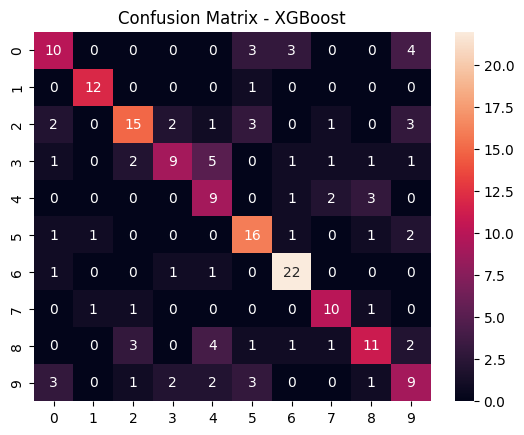

In [104]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Print classification report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [111]:
def predict_genre(sample_features):
    sample_scaled = scaler.transform([sample_features])
    genre_code = xgb_model.predict(sample_scaled)[0]
    genre_label = df["label"].astype("category").cat.categories[genre_code]
    return genre_label

# Example test input (provided feature values)
sample_input = [0.340983122587204, 0.09591842442750931, 1529.8353159300755, 2038.6175789692213, 3548.8202074363876, 0.056044256724071206, -207.55679321289062, 124.00672149658203, 8.930560111999512, 35.87468338012695, 2.91603684425354, 21.523725509643555, -8.554703712463379, 23.358671188354492, -10.103616714477539, 11.903743743896484, -5.56038761138916, 5.376802921295166, -2.239119529724121, 4.216963291168213, -6.01227331161499, 0.9361096024513245, -0.7165372371673584, 0.29387596249580383, -0.28743088245391846, 0.5315728187561035]

predicted_genre = predict_genre(sample_input)
print(f"Predicted Genre: {predicted_genre}")


Predicted Genre: blues


C:\Users\chet0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
